In [1]:
%%time
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib
Wall time: 7.16 s


In [2]:
path3 = r'C:\Users\Safonov\Downloads\11AA\Source\1.3\NYC' + '//'
FName3 = 'train.csv'
full_patch3 = path3 + FName3
full_patch3

'C:\\Users\\Safonov\\Downloads\\11AA\\Source\\1.3\\NYC//train.csv'

In [3]:
%%time
df = pd.read_csv(full_patch3) #, dtype={'pickup_datetime': float64,'dropoff_datetime': float64})
print(df.shape)

(1458644, 11)
Wall time: 5.43 s


In [4]:
%%time
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)
df['trip_time'] = df.dropoff_datetime - df.pickup_datetime

Wall time: 1.37 s


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 12 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
trip_time             1458644 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(3), object(2), timedelta64[ns](1)
memory usage: 133.5+ MB


In [6]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_time
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,00:07:35
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,00:11:03
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,00:35:24
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,00:07:09
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,00:07:15
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,00:07:23
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,00:05:41
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,00:25:51
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,00:04:15
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,00:20:25


In [7]:
def manh(row):
    lat1 = row['pickup_latitude']
    long1 = row['pickup_longitude']
    lat2 = row['pickup_latitude']
    long2 = row['dropoff_longitude']      
    long = abs(long1 - long2)
    lat = abs(lat1 - lat2)
    longkm = long * 20004274 / 360
    latkm =111321*cos(long1*3.14159/180)*lat
    return longkm + latkm

In [8]:
def t_interval(row):
    return row['pickup_datetime'].hour

In [9]:
#%%time
#df['dist'] = df.apply( manh, axis = 1 )

In [10]:
#%%time
#df['av_speed'] = df['dist'] / df['trip_duration']

In [13]:
#useful_cols = ['pickup_datetime', 'dropoff_datetime', 'passenger_count', 'store_and_fwd_flag', 
#               'trip_duration', 'trip_time'#, 'dist', 'av_speed'
#              ]
#df[useful_cols].sort_values( by = 'trip_time', ascending = False ).head(9)

In [14]:
#df1 = df.describe()

In [15]:
#df.info()

In [16]:
df.vendor_id.value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [17]:
df.store_and_fwd_flag.value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [18]:
#df[df.store_and_fwd_flag == 'Y'].describe()

In [19]:
#df[df.store_and_fwd_flag == 'N'].describe()

In [20]:
%%time
df['Hour'] = df.apply( t_interval, axis = 1 )

Wall time: 2min 27s


In [21]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_time,Hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,00:07:35,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,00:11:03,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,00:35:24,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,00:07:09,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,00:07:15,13
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,00:07:23,22
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,00:05:41,22
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,00:25:51,7
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,00:04:15,23
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,00:20:25,21


In [22]:
df.Hour.value_counts()

18    90600
19    90308
21    84185
20    84072
22    80492
17    76483
14    74292
12    71873
15    71811
13    71473
23    69785
11    68476
9     67663
8     67053
10    65437
16    64313
7     55600
0     53248
1     38571
6     33248
2     27972
3     20895
4     15792
5     15002
Name: Hour, dtype: int64

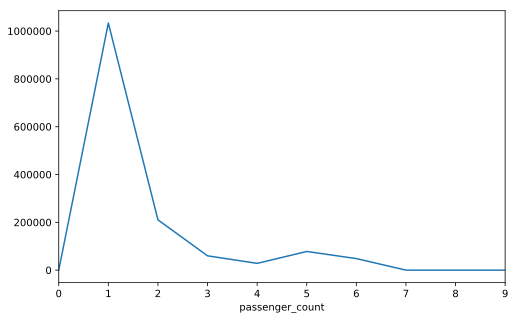

In [25]:
df.groupby( 'passenger_count' ).count()['Hour'].plot()